In [1]:
# import liabraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt , seaborn as sns 
%matplotlib inline
import statistics
import warnings
warnings.filterwarnings('ignore')

# import dataset

In [2]:
df = pd.read_csv(r"bank-marketing.csv")
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.shape   #here we can see total no. of row and column

(45211, 19)

In [4]:
# checking data types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


In [6]:
#checking unique value
df.nunique()

age            77
job            12
salary         11
marital         3
education       4
targeted        2
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
response        2
dtype: int64

In [7]:

df.isnull().sum()

age          0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

In [8]:
# dataset does not contain any missing value

In [9]:
df.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Describe the pdays column, make note of the mean, median and minimum values. Anything
### fishy in the values?

In [10]:
df.pdays.describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [11]:
print('mean is',df['pdays'].mean())
print('median is',df['pdays'].median())
print('min is',df['pdays'].min())

mean is 40.19782796222158
median is -1.0
min is -1


In [12]:
# here we can see numerical summary of mean and std. but we can see lots of value are -1,We can see that 75% values
# of pdays are -1.so -1 are special number of previous compaign.

### Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How
### different are the mean and the median values?

In [13]:
# here we can see pdays uses -1 as indicator and not value. Hence treat these value as missing
# Wherever pdays is -1, replace with NaN

In [14]:
df1 = df.copy()

In [15]:
df1.drop(df1[df1['pdays'] < 0].index, inplace = True)

In [16]:
df1.pdays.describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

In [17]:
# This time mean and median has changed significantly because we have removed the case where pdays value is -1

### Plot a horizontal bar graph with the median values of balance for each education level value.
### Which group has the highest median?

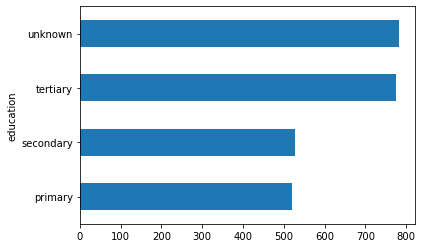

unknown has highest median 782


In [18]:
df2 = df1.groupby(['education'])['balance'].median()
df2.plot(kind = 'barh')
plt.show()
print('unknown has highest median', df2.max())

### Make a box plot for pdays. Do you see any outliers?

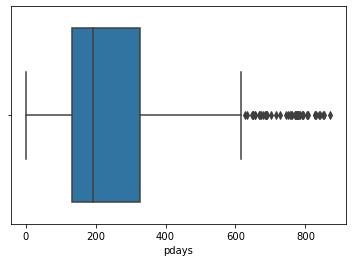

Boxplot without -1 pdays


In [19]:
sns.boxplot(df1['pdays'])
plt.show()
print('Boxplot without -1 pdays')

In [20]:
# handling the outlier

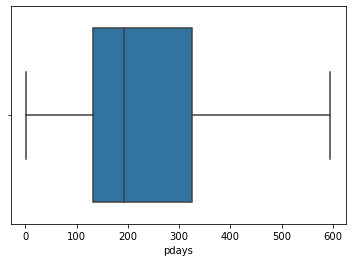

boxplot with no outlier


In [21]:
df2 = df1[df1['pdays'] >= 600] 
df1 = df1.drop(df2.index, axis = 0)
sns.boxplot(df1['pdays'])
plt.show()

print("boxplot with no outlier")

### The final goal is to make a predictive model to predict if the customer will respond positively to the
### campaign or not. The target variable is “response”.

In [22]:
# bi-variate analysis

### Convert the response variable to a convenient form

In [23]:
df1.response.value_counts()

no     6319
yes    1886
Name: response, dtype: int64

In [24]:
df1.replace({'response':{'yes':1, 'no':0}}, inplace = True)

In [25]:
df1.response.value_counts()

0    6319
1    1886
Name: response, dtype: int64

In [26]:
df1.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,33,admin.,50000,married,tertiary,yes,no,882,no,no,telephone,21,oct,39,1,151,3,failure,0
24062,42,admin.,50000,single,secondary,yes,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,1
24064,33,services,70000,married,secondary,yes,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,1
24072,36,management,100000,married,tertiary,yes,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,0
24077,36,management,100000,married,tertiary,yes,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,1













### Make suitable plots for associations with numerical features and categorical features’


In [27]:
# Identifying categorical and numerical columns

In [28]:
cols = df1.columns.to_list()
num_cols = df1._get_numeric_data().columns.to_list()
cat_cols = list(set(cols) - set(num_cols))

print('numerical columns')
print(num_cols)
print('/ncategorical_columns')
print(cat_cols)

numerical columns
['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'response']
/ncategorical_columns
['default', 'poutcome', 'targeted', 'housing', 'loan', 'education', 'month', 'job', 'contact', 'marital']


In [29]:


# Visualizing Numerical Features with Response

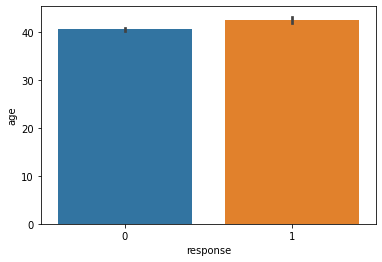

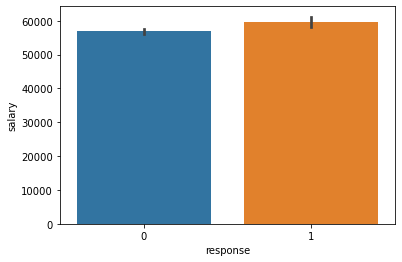

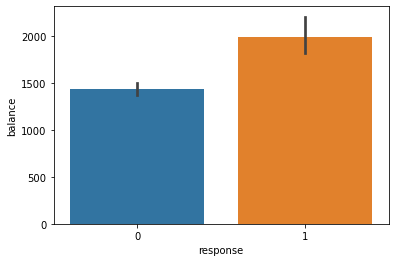

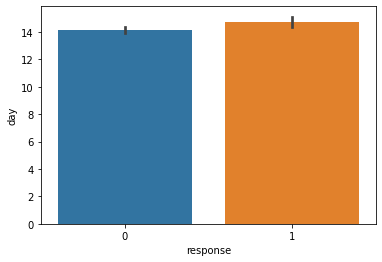

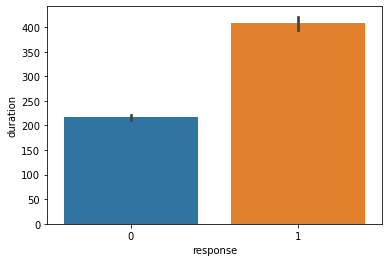

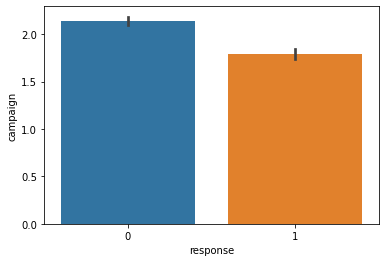

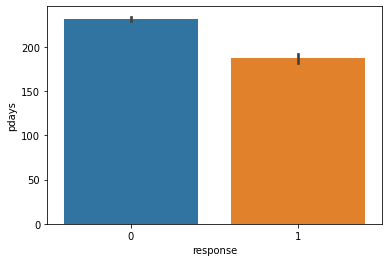

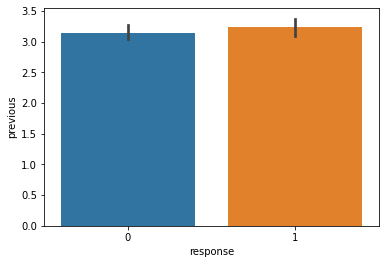

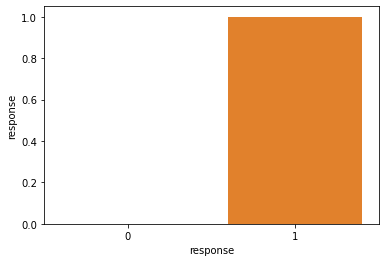

In [30]:
for i in df1[num_cols]:
    sns.barplot(df1['response'], df1[i])
    plt.show()

In [31]:
# Visualizing Categorical Features with Response

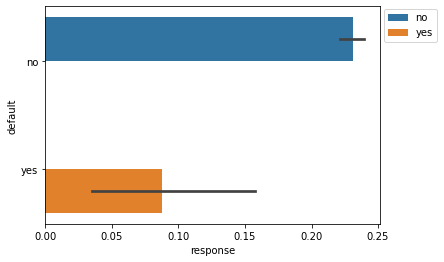

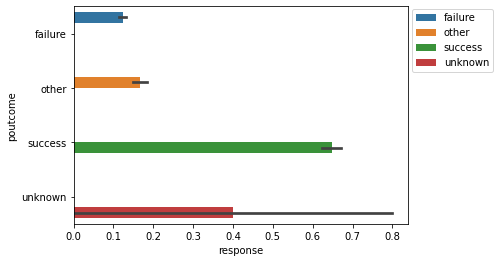

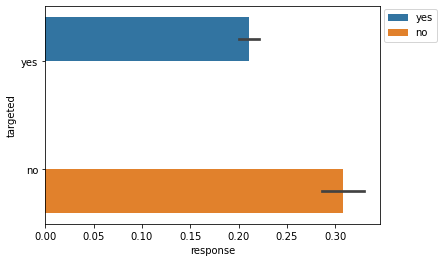

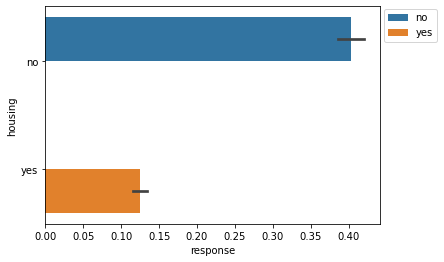

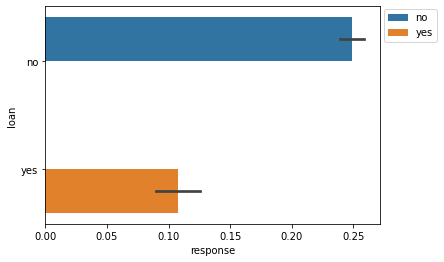

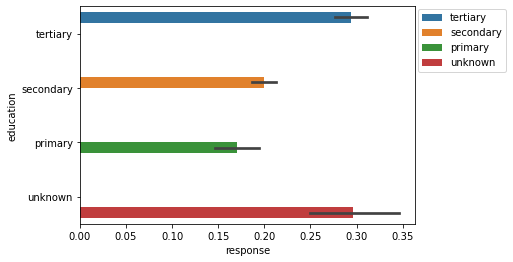

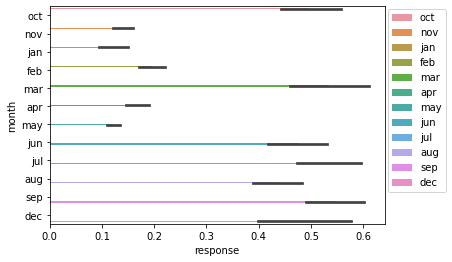

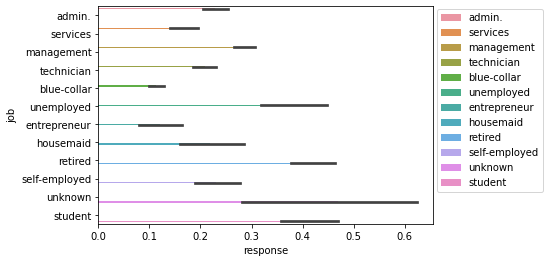

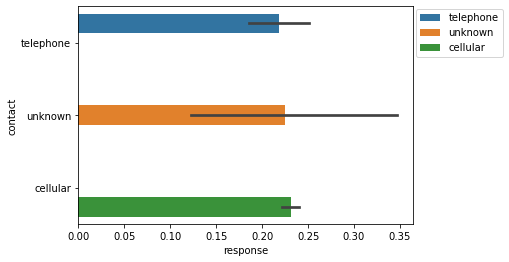

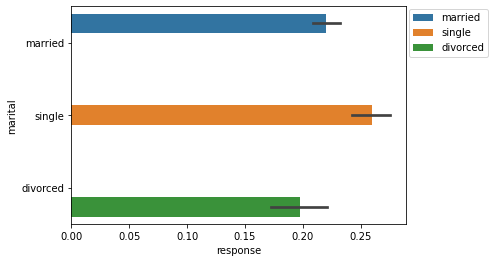

In [32]:
for i in df1[cat_cols]:
    sns.barplot(df1['response'], df1[i], hue= df1[i])
    plt.legend(bbox_to_anchor = (1.01,.99),borderaxespad=0,loc=2)
    plt.show()

###  * Yes previous campaign data is useful & pdays, poutcome is associated with the target variable 'response'


### * The -1 pdays or missing values or outliers are filtered out as we would not be using that in Modelling.

### The necessary transformations for the categorical variables and the numeric variables ?

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
df2 = df1[cat_cols].apply(LabelEncoder().fit_transform)

In [35]:
df2.head()

,default,poutcome,targeted,housing,loan,education,month,job,contact,marital
24060,0,0,1,0,0,2,10,0,1,1
24062,0,1,1,1,1,1,10,0,1,2
24064,0,0,1,1,0,1,10,7,1,1
24072,0,1,1,1,0,2,10,4,1,1
24077,0,0,1,1,0,2,10,4,1,1


### Handle variables corresponding to the previous campaign ?

In [36]:
df3 = df2.join(df1[num_cols])

In [37]:
df3.head()

,default,poutcome,targeted,housing,loan,education,month,job,contact,marital,age,salary,balance,day,duration,campaign,pdays,previous,response
24060,0,0,1,0,0,2,10,0,1,1,33,50000,882,21,39,1,151,3,0
24062,0,1,1,1,1,1,10,0,1,2,42,50000,-247,21,519,1,166,1,1
24064,0,0,1,1,0,1,10,7,1,1,33,70000,3444,21,144,1,91,4,1
24072,0,1,1,1,0,2,10,4,1,1,36,100000,2415,22,73,1,86,4,0
24077,0,0,1,1,0,2,10,4,1,1,36,100000,0,23,140,1,143,3,1


In [38]:
df3.corr()

,default,poutcome,targeted,housing,loan,education,month,job,contact,marital,age,salary,balance,day,duration,campaign,pdays,previous,response
default,1.000000,-0.025767,0.019620,0.022611,0.052473,-0.013600,0.020435,-0.021111,-0.019521,-0.005753,-0.027905,0.000392,-0.045128,-0.000964,-0.002728,-0.002308,0.038702,0.012505,-0.028256
poutcome,-0.025767,1.000000,-0.071648,-0.287046,-0.103648,0.083959,-0.018198,0.066452,0.024316,0.045484,0.052255,0.013536,0.051497,0.016912,0.110449,-0.001180,-0.243675,0.042900,0.425229
targeted,0.019620,-0.071648,1.000000,0.086574,0.070190,-0.632761,0.011374,-0.091083,0.024672,-0.255486,0.141069,-0.227927,-0.052601,-0.025070,-0.016042,0.017189,0.084503,-0.002387,-0.092791
housing,0.022611,-0.287046,0.086574,1.000000,0.112240,-0.127906,0.017032,-0.132182,-0.072051,-0.056352,-0.179517,-0.034703,-0.109598,-0.067401,-0.072505,0.062326,0.365964,0.007706,-0.320280
loan,0.052473,-0.103648,0.070190,0.112240,1.000000,-0.048812,-0.000715,-0.033795,-0.028964,-0.055374,-0.009009,0.014393,-0.084921,0.008988,-0.032730,0.008033,0.022819,0.013683,-0.115212
education,-0.013600,0.083959,-0.632761,-0.127906,-0.048812,1.000000,-0.012213,0.159377,-0.050515,0.122070,-0.120713,0.422500,0.074225,0.023110,-0.001378,-0.024108,-0.157076,0.000963,0.108581
month,0.020435,-0.018198,0.011374,0.017032,-0.000715,-0.012213,1.000000,-0.002806,0.041944,-0.024663,0.014876,0.018868,0.016244,-0.024655,-0.034737,0.024708,0.010131,0.012016,-0.009015
job,-0.021111,0.066452,-0.091083,-0.132182,-0.033795,0.159377,-0.002806,1.000000,0.000723,0.072865,-0.020727,0.115646,0.041900,0.014952,0.023745,-0.009013,-0.116824,-0.000903,0.079660
contact,-0.019521,0.024316,0.024672,-0.072051,-0.028964,-0.050515,0.041944,0.000723,1.000000,-0.028908,0.175935,-0.035471,0.038262,-0.012872,-0.023321,0.077261,0.012072,0.037374,-0.007714
marital,-0.005753,0.045484,-0.255486,-0.056352,-0.055374,0.122070,-0.024663,0.072865,-0.028908,1.000000,-0.415511,-0.043422,-0.020178,0.016389,-0.009392,-0.008772,-0.006392,0.005519,0.049751


## Logistic Regression

### Make a predictive model using logistic regression?

### Train test split

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [40]:
X = df3.drop(['response'],axis=1)
y = df3['response']

print(X.head())

       default  poutcome  targeted  housing  loan  education  month  job  \
24060        0         0         1        0     0          2     10    0   
24062        0         1         1        1     1          1     10    0   
24064        0         0         1        1     0          1     10    7   
24072        0         1         1        1     0          2     10    4   
24077        0         0         1        1     0          2     10    4   

       contact  marital  age  salary  balance  day  duration  campaign  pdays  \
24060        1        1   33   50000      882   21        39         1    151   
24062        1        2   42   50000     -247   21       519         1    166   
24064        1        1   33   70000     3444   21       144         1     91   
24072        1        1   36  100000     2415   22        73         1     86   
24077        1        1   36  100000        0   23       140         1    143   

       previous  
24060         3  
24062         1  
24

In [41]:
print(y.head())

24060    0
24062    1
24064    1
24072    0
24077    1
Name: response, dtype: int64


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [43]:
lr = LogisticRegression()

In [44]:
import statsmodels.api as sm

In [45]:
lr = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.381454
         Iterations 7


In [46]:
print(lr.summary())

                           Logit Regression Results                           
Dep. Variable:               response   No. Observations:                 5743
Model:                          Logit   Df Residuals:                     5725
Method:                           MLE   Df Model:                           17
Date:                Wed, 19 Jan 2022   Pseudo R-squ.:                  0.2913
Time:                        15:35:52   Log-Likelihood:                -2190.7
converged:                       True   LL-Null:                       -3091.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
default       -0.6149      0.574     -1.071      0.284      -1.740       0.510
poutcome       0.9851      0.046     21.279      0.000       0.894       1.076
targeted      -0.6276      0.103     -6.080      0.0

In [47]:
predictions = lr.predict(X_test)

In [48]:
X_test

,default,poutcome,targeted,housing,loan,education,month,job,contact,marital,age,salary,balance,day,duration,campaign,pdays,previous
36349,0,1,1,1,0,1,8,1,0,2,38,20000,328,11,776,4,349,1
25305,0,0,0,1,0,2,9,9,0,2,30,60000,0,18,342,2,174,1
33727,0,1,1,1,0,1,0,0,1,2,39,50000,720,22,154,8,14,5
25636,0,0,1,1,0,0,9,1,1,1,40,20000,4608,19,111,2,156,1
45025,0,2,1,0,0,1,10,5,0,1,61,55000,938,15,212,2,92,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42702,0,2,1,0,0,2,4,3,0,1,63,16000,1528,18,309,2,95,3
42932,0,0,1,0,0,0,3,5,1,0,84,55000,2619,8,145,2,115,2
42047,0,0,1,0,0,1,10,1,0,1,61,20000,272,29,318,1,269,1
25477,0,0,1,1,0,2,9,7,1,1,42,70000,412,19,142,4,169,5


In [49]:
predictions

36349    0.344521
25305    0.111108
33727    0.033940
25636    0.038744
45025    0.576100
           ...   
42702    0.658390
42932    0.122136
42047    0.210714
25477    0.020502
40150    0.596449
Length: 2462, dtype: float64

In [50]:
y_test

36349    0
25305    0
33727    0
25636    0
45025    0
        ..
42702    0
42932    0
42047    0
25477    0
40150    1
Name: response, Length: 2462, dtype: int64

In [51]:
y_pred_new = np.where(predictions > 0.3,1,0)

In [52]:
print(classification_report(y_test, y_pred_new))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1892
           1       0.59      0.71      0.64       570

    accuracy                           0.82      2462
   macro avg       0.75      0.78      0.76      2462
weighted avg       0.83      0.82      0.82      2462



In [53]:
confusion_matrix(y_pred_new,y_test)

array([[1605,  163],
       [ 287,  407]], dtype=int64)

In [54]:
f1_score(y_pred_new,y_test)

0.6439873417721519

### Use RFE to select top n features in an automated fashion (choose n as you see fit)

In [55]:
lr = LogisticRegression()

In [56]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
rfe = RFE(lr, 5)
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=5)

In [57]:
rfe.support_

array([False,  True, False,  True,  True,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False])

In [58]:
X_train.columns[rfe.support_]

Index(['poutcome', 'housing', 'loan', 'education', 'contact'], dtype='object')

In [59]:
cols = X_train.columns[rfe.support_]

In [60]:
lr.fit(X_train[cols],y_train)

LogisticRegression()

In [61]:
y_pred2 = lr.predict(X_test[cols])

In [62]:
f1_score(y_pred2,y_test)

0.5100671140939598

In [63]:
confusion_matrix(y_pred2,y_test)

array([[1796,  342],
       [  96,  228]], dtype=int64)

In [64]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      1892
           1       0.70      0.40      0.51       570

    accuracy                           0.82      2462
   macro avg       0.77      0.67      0.70      2462
weighted avg       0.81      0.82      0.80      2462



### Using p values and VIF, get rid of the redundant features

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [66]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif  

,features,VIF
10,age,11.89
2,targeted,6.58
5,education,6.49
16,pdays,5.95
11,salary,5.39
9,marital,4.37
13,day,4.08
6,month,3.63
3,housing,3.25
7,job,2.86


### Estimate the model performance using k fold cross validation

In [67]:
lr.fit(X_train, y_train)

LogisticRegression()

In [68]:
cv_score = cross_val_score(lr, X_train, y_train, cv = 5)

np.mean(cv_score)

0.7809499549676586

### What is the precision, recall, accuracy of your model?

In [69]:
print(classification_report(y_test, y_pred_new))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1892
           1       0.59      0.71      0.64       570

    accuracy                           0.82      2462
   macro avg       0.75      0.78      0.76      2462
weighted avg       0.83      0.82      0.82      2462



In [90]:
confusion_matrix(y_pred_new,y_test)

array([[1605,  163],
       [ 287,  407]], dtype=int64)

In [70]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      1892
           1       0.70      0.40      0.51       570

    accuracy                           0.82      2462
   macro avg       0.77      0.67      0.70      2462
weighted avg       0.81      0.82      0.80      2462



In [91]:
confusion_matrix(y_pred2,y_test)

array([[1796,  342],
       [  96,  228]], dtype=int64)

### Which features are the most important from your model?

### 'poutcome', 'housing', 'loan', 'education', 'contact' best features from logistic regression

## Random Forest

### Make a predictive model using random forest technique

In [71]:
from sklearn.ensemble import RandomForestClassifier

### Use not more than 50 trees, and control the depth of the trees to prevent overfitting

In [72]:
rfc = RandomForestClassifier(max_depth = 5, random_state=44, max_leaf_nodes = 50)

In [73]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_leaf_nodes=50, random_state=44)

### Estimate the model performance using k fold cross validation

In [74]:
cv2_score = cross_val_score(rfc, X_train, y_train, cv = 5)
np.mean(cv2_score)

0.840325779423404

### What is the precision, recall, accuracy of your model?

In [75]:
y_pred1 = rfc.predict(X_test)

In [76]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1892
           1       0.77      0.46      0.57       570

    accuracy                           0.84      2462
   macro avg       0.81      0.71      0.74      2462
weighted avg       0.83      0.84      0.83      2462



In [77]:
f1_score(y_test,y_pred1)

0.5745614035087718

In [78]:
confusion_matrix(y_test,y_pred1)

array([[1812,   80],
       [ 308,  262]], dtype=int64)

In [79]:
from sklearn.metrics import roc_auc_score

In [80]:
roc_auc_score(y_test,y_pred1)

0.708682912354883

### Using the feature importance values from the Random Forest module, identify the most
### important features for the model

### RFE

In [81]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
rfe1 = RFE(rfc, 5)
rfe1.fit(X_train,y_train)

RFE(estimator=RandomForestClassifier(max_depth=5, max_leaf_nodes=50,
                                     random_state=44),
    n_features_to_select=5)

In [82]:
rfe1.support_

array([False,  True, False,  True, False, False,  True, False, False,
       False, False, False, False, False,  True, False,  True, False])

In [83]:
X_train.columns[rfe1.support_]

Index(['poutcome', 'housing', 'month', 'duration', 'pdays'], dtype='object')

In [84]:
cols = X_train.columns[rfe1.support_]

In [85]:
rfc.fit(X_train[cols],y_train)

RandomForestClassifier(max_depth=5, max_leaf_nodes=50, random_state=44)

In [86]:
y_pred3 = rfc.predict(X_test[cols])

In [87]:
f1_score(y_pred3,y_test)

0.5987525987525988

In [88]:
confusion_matrix(y_pred3,y_test)

array([[1788,  282],
       [ 104,  288]], dtype=int64)

In [89]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1892
           1       0.73      0.51      0.60       570

    accuracy                           0.84      2462
   macro avg       0.80      0.73      0.75      2462
weighted avg       0.83      0.84      0.83      2462



## Compare the performance of the Random Forest and the logistic model – -->
### Evaluate both models on the test set

In [92]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      1892
           1       0.70      0.40      0.51       570

    accuracy                           0.82      2462
   macro avg       0.77      0.67      0.70      2462
weighted avg       0.81      0.82      0.80      2462



In [93]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1892
           1       0.73      0.51      0.60       570

    accuracy                           0.84      2462
   macro avg       0.80      0.73      0.75      2462
weighted avg       0.83      0.84      0.83      2462



### Which metric did you choose and why?

#### based on Classification Metrics i choose a Accuracy in both algoritham.  random forest has 84% accuracy
#### and logistic regression has 82% accuracy

### Which model has better performance on the test set? 

#### random forest has 84% accuracy , and logistc has 82% accuracy. so random forest has better performance on test set,
#### as compare to logistic regression

### Compare the feature importance from the different models – do they agree? Are the top
### features similar in both models?

#### 'poutcome', 'housing', 'month', 'duration', 'pdays' the top features are similar in both models.